In [254]:
from typing import List

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

### Explore the data and features

In [255]:
df = pd.read_csv(
    "/Users/thobelasixpence/Documents/mlops-zoomcamp-project-2024/MLOps-hotel-reservation-prediction-system/data/raw/Hotel Reservations.csv"
)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [256]:
df.shape

(36275, 19)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [258]:
# Plan of attack
# 1. Data cleaning - remove duplicates, missing values, irrelevant columns
# 2. Data exploration - understand the data distribution and relationships
# 3. Data visualization - create visualizations to communicate findings
# 4. Feature engineering - generate new features or PCA , handle outliers, deal with categorical variables, prepare the data for modeling
# 5. Data modeling - build and evaluate machine learning models
# 6. Data deployment - deploy the model to a dev and production environment
# 7. Data monitoring - monitor the model performance in production
# 8. Data maintenance - update the model as needed
# 9. Data documentation - document the process and findings

In [259]:
df.drop(columns=["Booking_ID"], inplace=True)
df.drop_duplicates(inplace=True)


In [260]:
df.shape

(26000, 18)

### Data exploration

In [261]:
def get_categorical_columns(df: pd.DataFrame) -> List[str]:
    """
    Get categorical columns from the dataframe
    """
    categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
    return categorical_columns

In [262]:
def get_numerical_columns(df: pd.DataFrame) -> List[str]:
    """
    Get numerical columns from the dataframe
    """
    numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
    return numerical_columns


In [263]:
cat_cols: List[str] = get_categorical_columns(df)
num_cols: List[str] = get_numerical_columns(df)
len(cat_cols), len(num_cols)

(4, 14)

In [264]:
cat_cols.extend(["required_car_parking_space", "repeated_guest"])
num_cols.remove("required_car_parking_space")
num_cols.remove("repeated_guest")

In [265]:
# cat_cols
num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [266]:
df.sample(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
16565,2,0,2,0,Meal Plan 1,0,Room_Type 1,228,2018,5,22,Online,0,0,0,106.20,1,Canceled
16165,2,0,2,4,Meal Plan 1,1,Room_Type 4,5,2017,10,28,Online,0,0,0,129.65,0,Not_Canceled
18028,2,0,0,1,Meal Plan 1,0,Room_Type 1,13,2018,9,20,Online,0,0,0,119.20,0,Not_Canceled
27164,2,0,2,3,Meal Plan 1,0,Room_Type 1,8,2018,1,8,Online,0,0,0,59.16,0,Not_Canceled
14148,2,0,1,0,Meal Plan 1,0,Room_Type 1,1,2018,6,26,Online,0,0,0,109.00,1,Not_Canceled
1569,3,0,1,2,Meal Plan 1,0,Room_Type 4,38,2018,3,21,Online,0,0,0,102.70,2,Not_Canceled
24069,2,0,2,1,Meal Plan 1,0,Room_Type 1,39,2018,11,19,Offline,0,0,0,72.00,0,Not_Canceled
318,2,0,2,3,Meal Plan 1,0,Room_Type 4,189,2018,7,17,Online,0,0,0,99.45,1,Not_Canceled
2831,1,0,0,3,Meal Plan 2,0,Room_Type 1,71,2018,5,10,Offline,0,0,0,98.00,0,Not_Canceled
30259,2,0,2,5,Meal Plan 1,0,Room_Type 4,76,2018,10,22,Online,0,0,0,116.36,1,Not_Canceled


In [267]:
def numerical_distrubition_plot(df: pd.DataFrame, num_features: int) -> None:
    """
    Function to plot the distribution of numerical features in a DataFrame.
    Args:
        df (pd.DataFrame): DataFrame containing the data.
        num_features (list): List of numerical features to plot.
    """
    _, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
    if len(num_features) == 1:
        axes = [axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")

    plt.tight_layout()

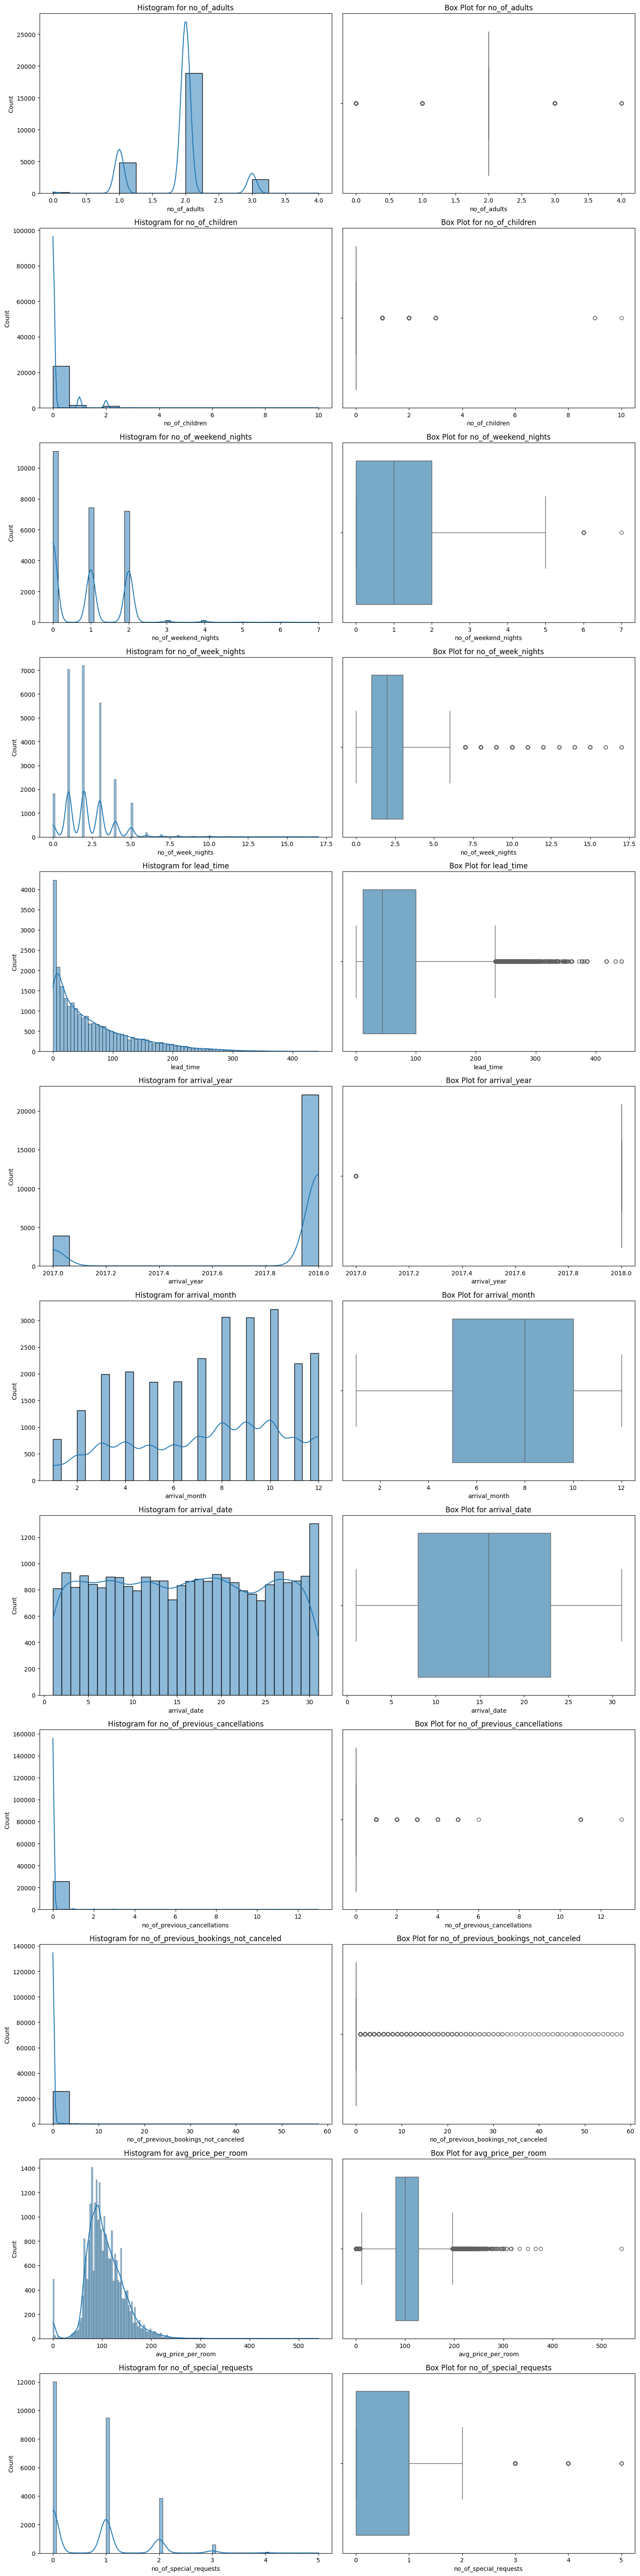

In [268]:
numerical_distrubition_plot(df, num_cols)

In [269]:
def categorical_distribution_plot(df: pd.DataFrame, cat_features: int) -> None:
    """
    Function to plot the distribution of categorical features in a DataFrame.
    Args:
        df (pd.DataFrame): DataFrame containing the data.
        cat_features (list): List of categorical features to plot.
    """
    _, axes = plt.subplots(len(cat_features), 2, figsize=(15, len(cat_features) * 5))
    if len(cat_features) == 1:
        axes = [axes]

    for i, column in enumerate(cat_features):
        sns.countplot(data=df, x=column, ax=axes[i][0], palette="Blues")
        axes[i][0].set_title(f"Count Plot for {column}")

        sns.boxplot(data=df, x=column, y="lead_time", ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column} vs lead_time")

    plt.tight_layout()


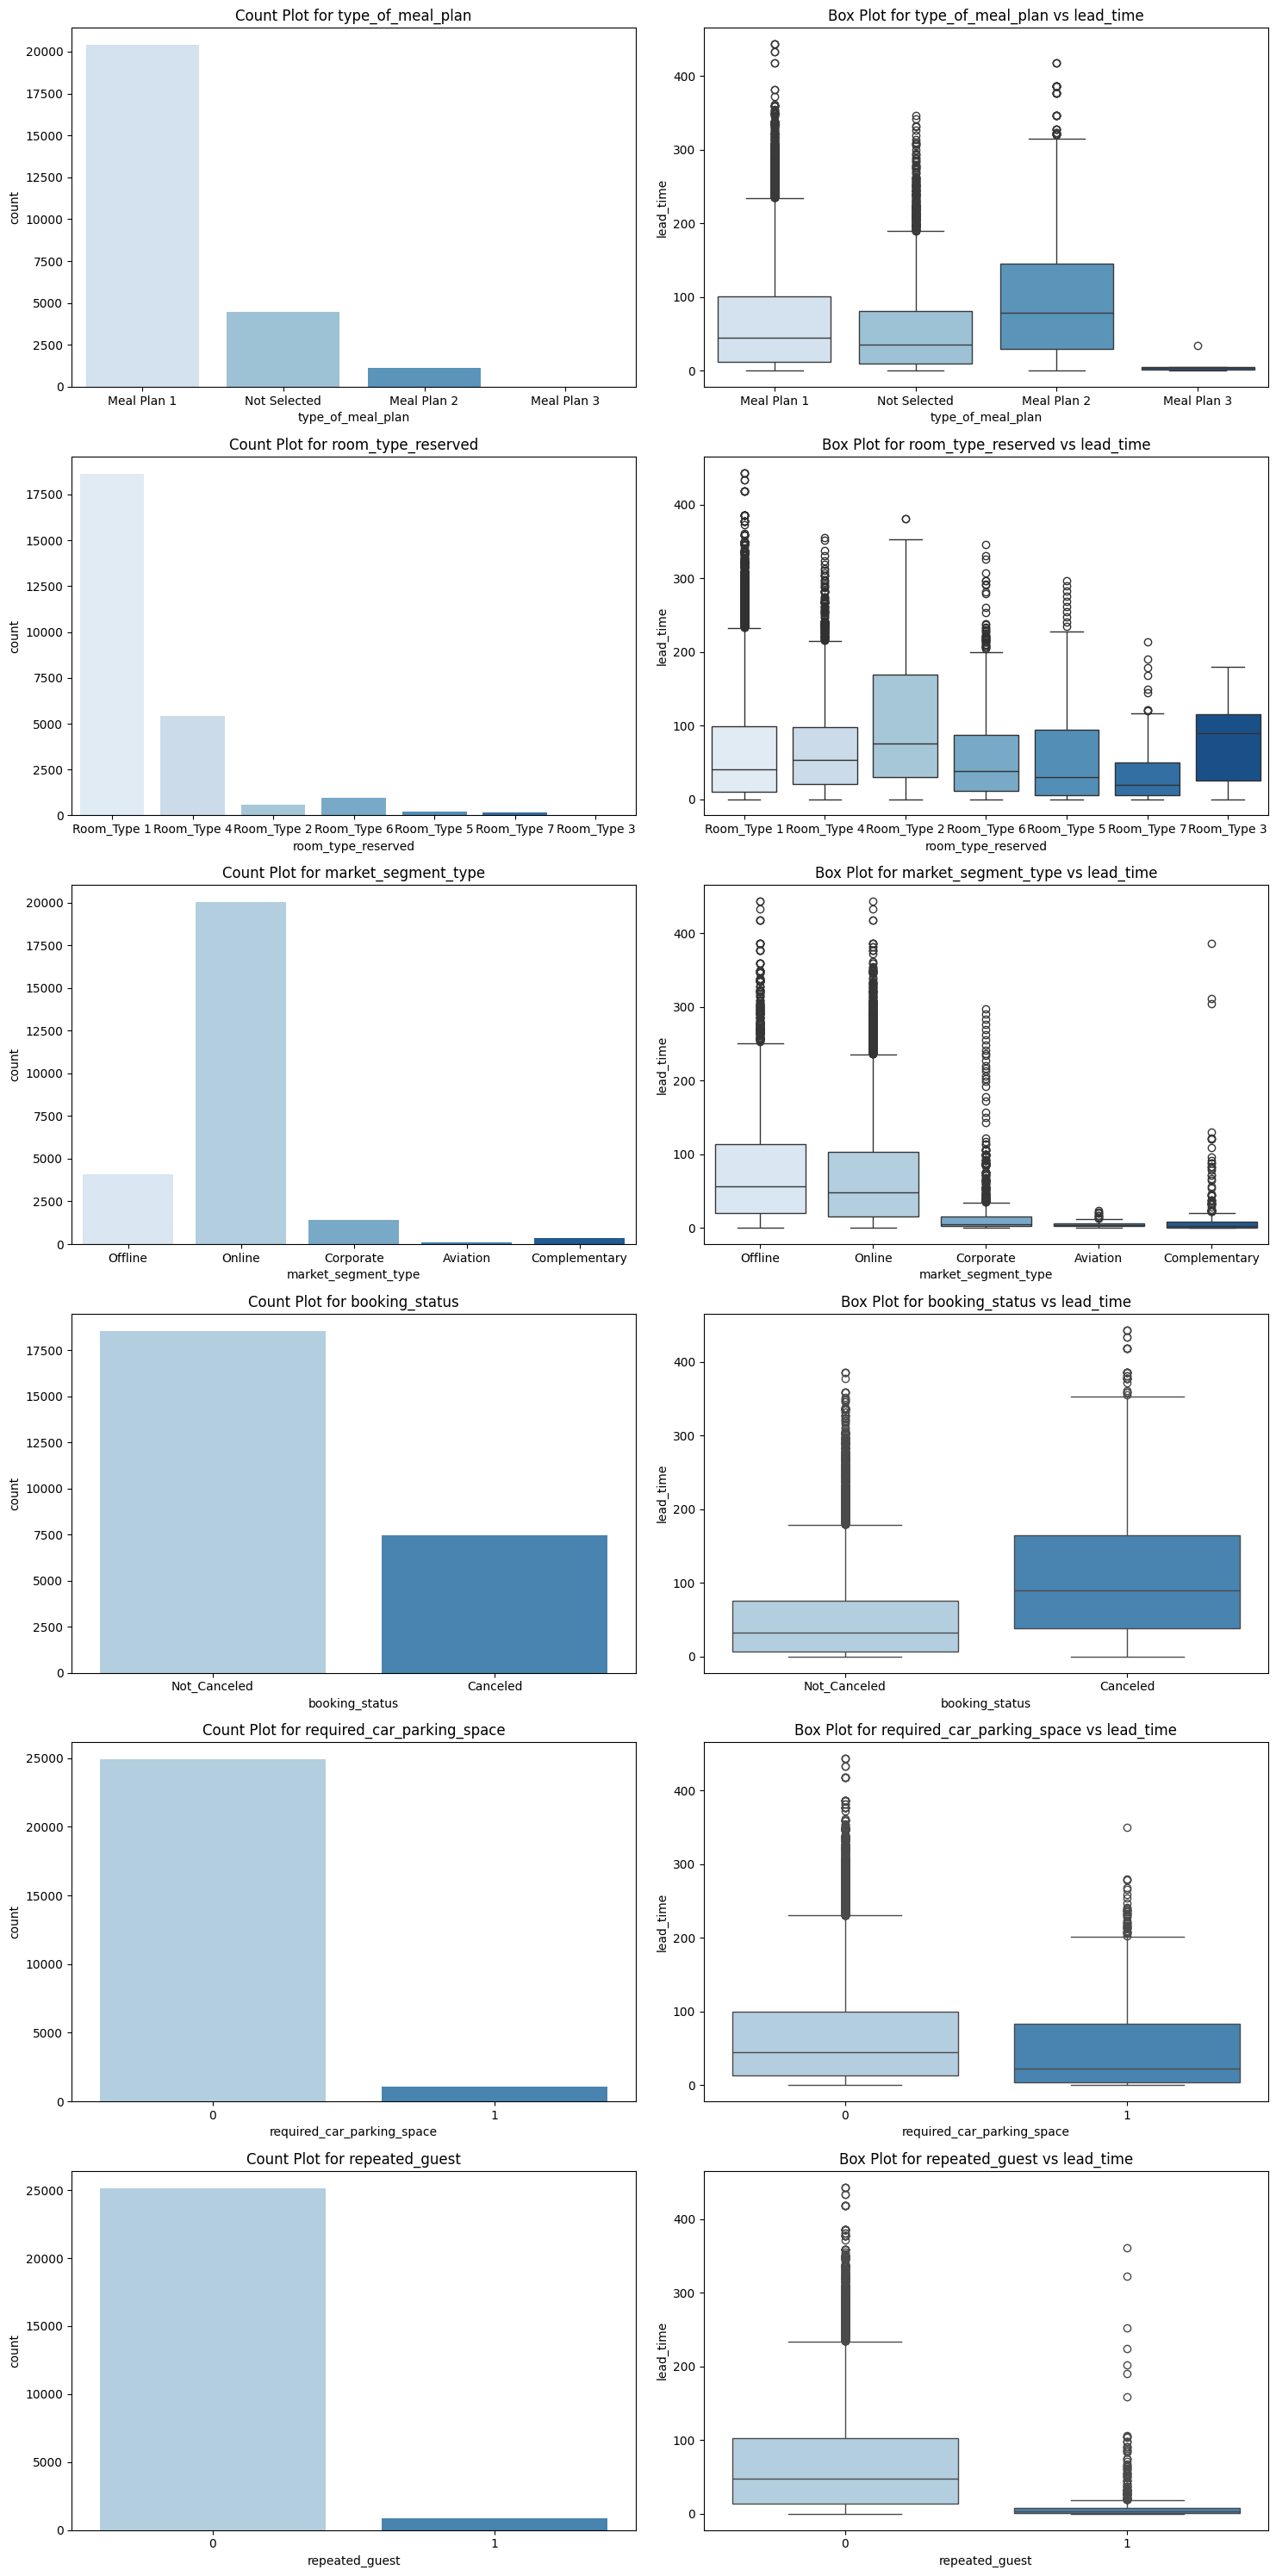

In [270]:
categorical_distribution_plot(df, cat_cols)

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  object 
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  object 
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_type 

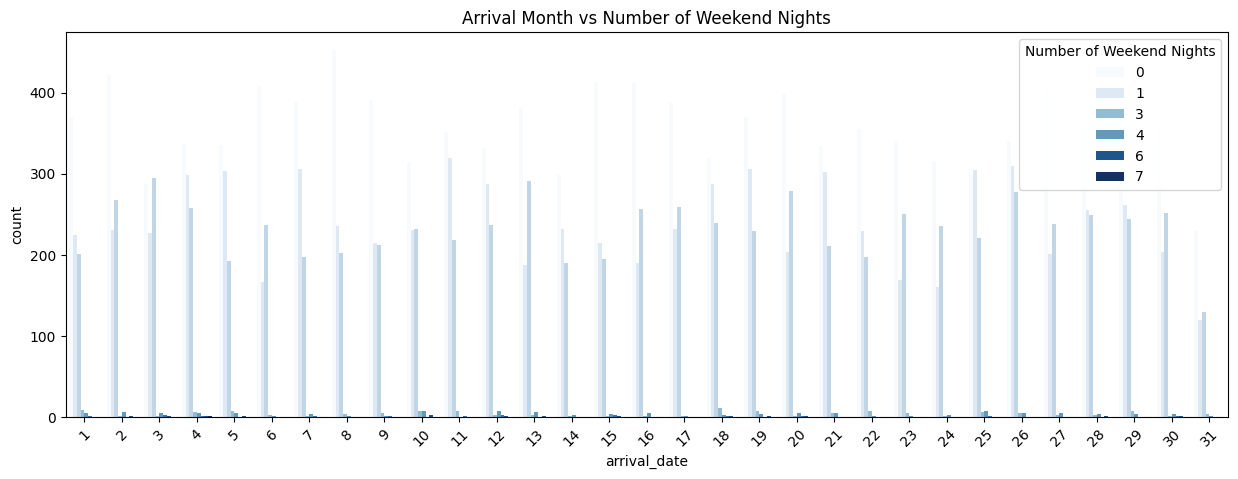

In [272]:
# compare arrival month and thee number of weekend nights
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="arrival_date", hue="no_of_weekend_nights", palette="Blues")
plt.title("Arrival Month vs Number of Weekend Nights")
plt.xticks(rotation=45)
plt.legend(title="Number of Weekend Nights")
plt.show()

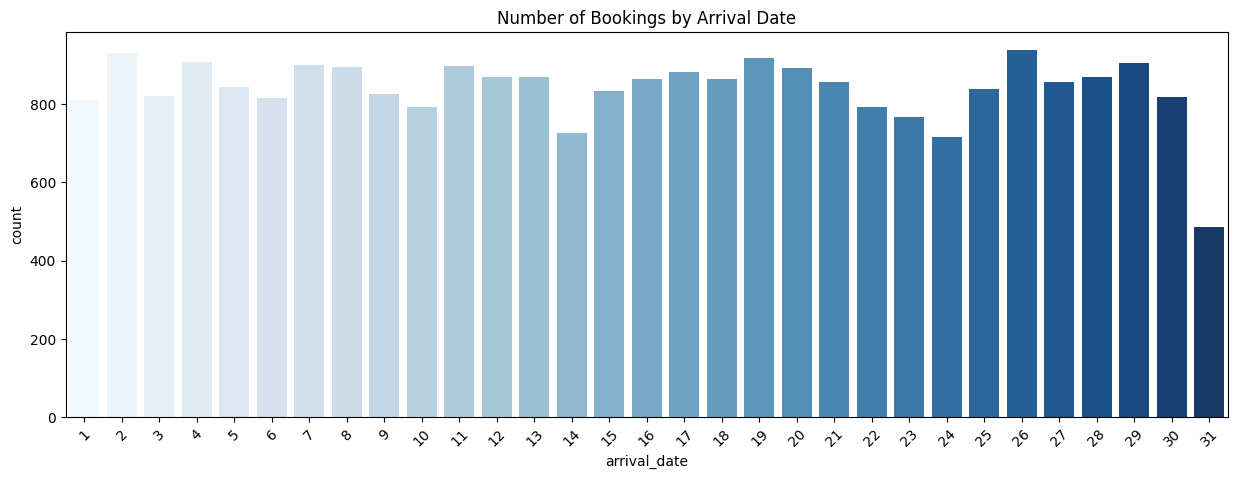

In [273]:
# number of bookkings by arrival date
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="arrival_date", palette="Blues")
plt.title("Number of Bookings by Arrival Date")
plt.xticks(rotation=45)
plt.show()


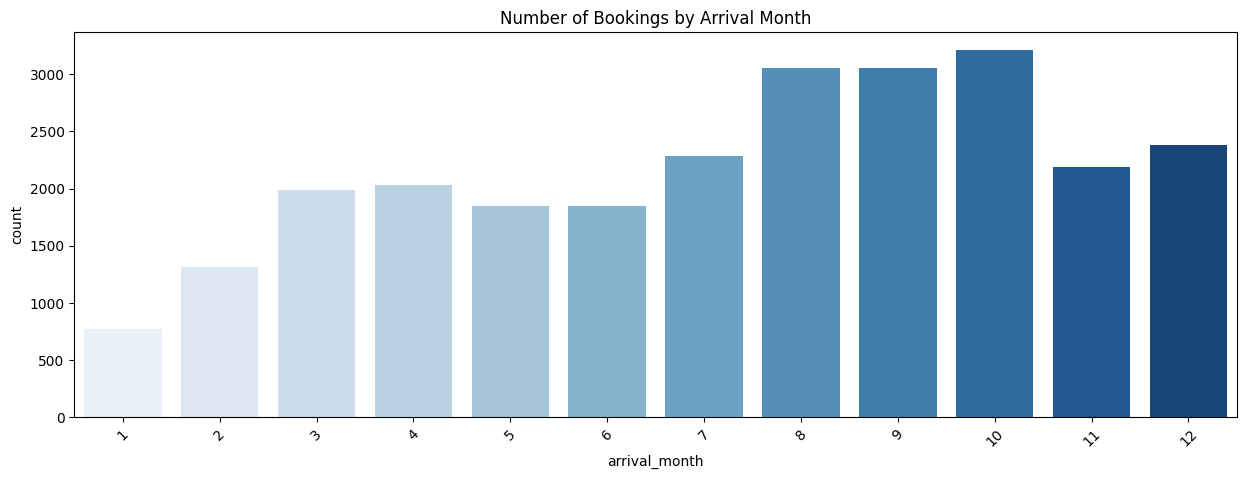

In [274]:
# number of bookings b arrival month
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="arrival_month", palette="Blues")
plt.title("Number of Bookings by Arrival Month")
plt.xticks(rotation=45)
plt.show()

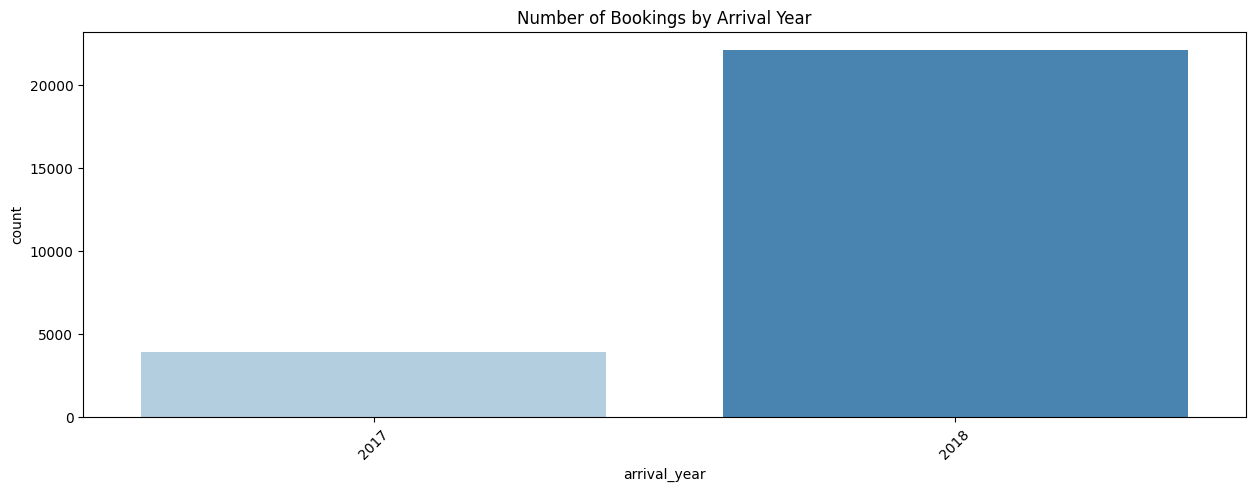

In [275]:
# number of bookings by arrival year
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="arrival_year", palette="Blues")
plt.title("Number of Bookings by Arrival Year")
plt.xticks(rotation=45)
plt.show()

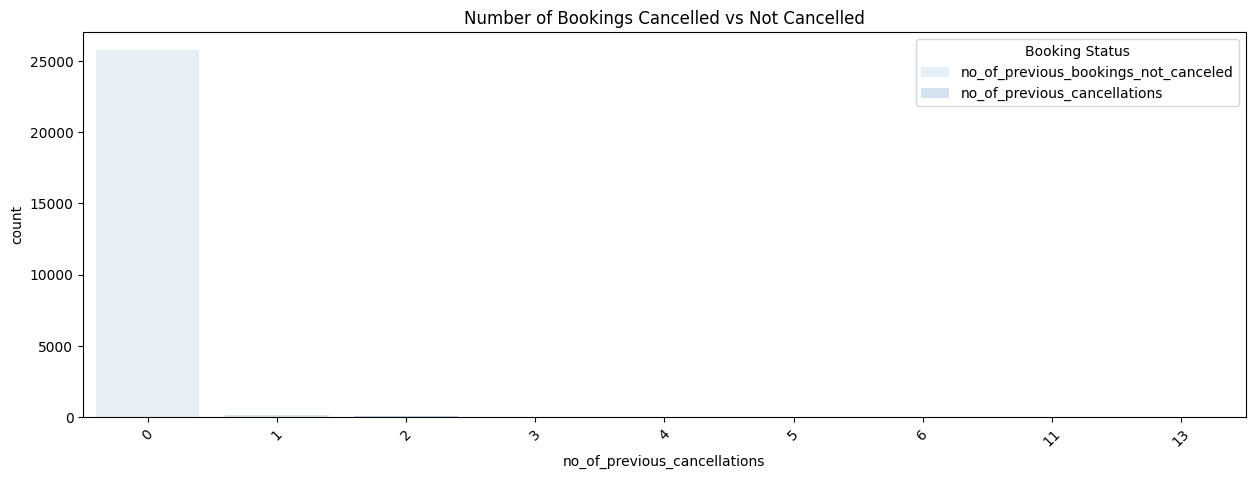

In [276]:
# number of bookings cancelled compared to not cancelled
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="no_of_previous_cancellations", palette="Blues")
plt.title("Number of Bookings Cancelled vs Not Cancelled")
plt.xticks(rotation=45)
plt.legend(
    title="Booking Status",
    labels=["no_of_previous_bookings_not_canceled", "no_of_previous_cancellations"],
)
plt.show()

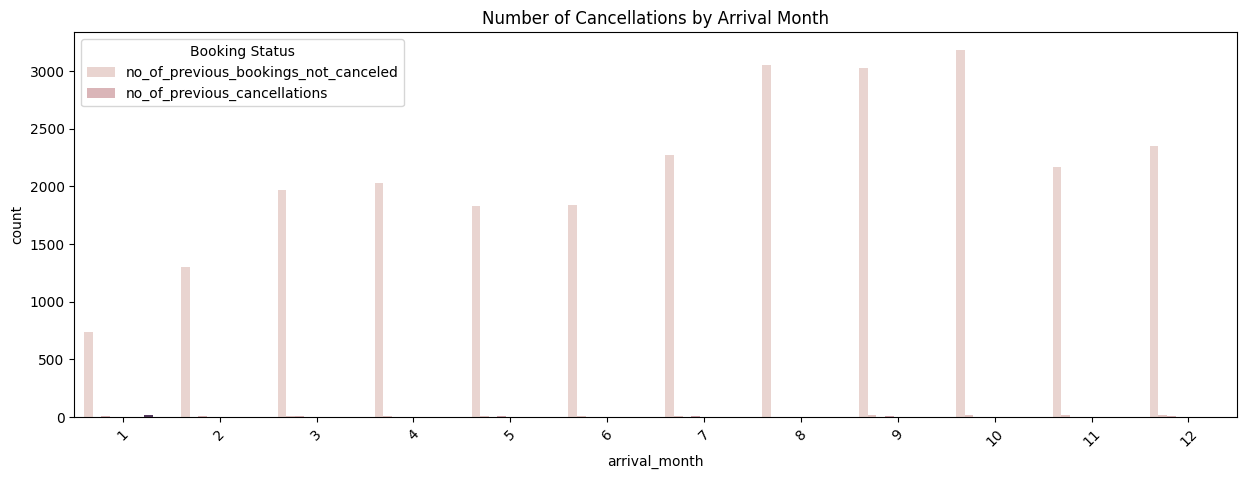

In [277]:
# number of cacncellations by arrival month
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="arrival_month", hue="no_of_previous_cancellations")
plt.title("Number of Cancellations by Arrival Month")
plt.xticks(rotation=45)
plt.legend(
    title="Booking Status",
    labels=["no_of_previous_bookings_not_canceled", "no_of_previous_cancellations"],
)
plt.show()


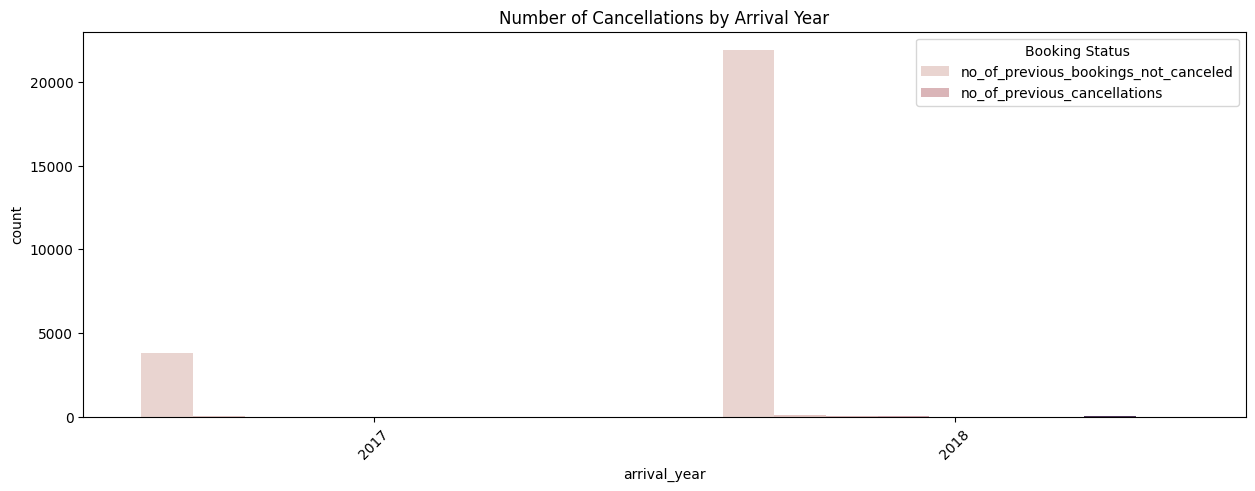

In [278]:
# number of cancellations by arrival year
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="arrival_year", hue="no_of_previous_cancellations")
plt.title("Number of Cancellations by Arrival Year")
plt.xticks(rotation=45)
plt.legend(
    title="Booking Status",
    labels=["no_of_previous_bookings_not_canceled", "no_of_previous_cancellations"],
)
plt.show()

In [279]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

### Data cleaning

In [280]:
import os
from loguru import logger


def load_data() -> pd.DataFrame:
    """
    Load data from a CSV file.
    Returns:
        pd.DataFrame: Loaded DataFrame.
    """
    try:
        file_path = os.getenv("RAW_DATA_PATH")
        if not file_path:
            raise ValueError("Environment variable 'RAW_DATA_PATH' is not set.")
        logger.info(f"loading data from {file_path}")
        return pd.read_csv(file_path)
    except FileNotFoundError as e:
        logger.error(f"File not found: {e}")
        raise e

In [281]:
def remove_duplicates(df: pd.DataFrame) -> pd.DataFrame:
    """
    Remove duplicate rows from the DataFrame.
    Args:
        df (pd.DataFrame): DataFrame to remove duplicates from.
    Returns:
        pd.DataFrame: DataFrame without duplicates.
    """
    return df.drop_duplicates()


def remove_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Remove rows with missing values from the DataFrame.
    Args:
        df (pd.DataFrame): DataFrame to remove missing values from.
    Returns:
        pd.DataFrame: DataFrame without missing values.
    """
    return df.dropna()


def remove_irrelevant_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Remove irrelevant columns from the DataFrame.
    Args:
        df (pd.DataFrame): DataFrame to remove irrelevant columns from.
    Returns:
        pd.DataFrame: DataFrame without irrelevant columns.
    """
    irrelevant_columns = ["Booking_ID"]
    df.drop(columns=irrelevant_columns, inplace=True)
    return df


def handle_data_types(df: pd.DataFrame) -> pd.DataFrame:
    """
    Handle data types of the DataFrame.
    Args:
        df (pd.DataFrame): DataFrame to handle data types for.
    Returns:
        pd.DataFrame: DataFrame with handled data types.
    """
    cat_cols = get_categorical_columns(df)
    for col in [col for col in cat_cols if df[col].dtype == "object"]:
        df[col] = df[col].astype("category")

    num_cols = get_numerical_columns(df)
    for col in num_cols:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    return df


def save_cleaned_data(df: pd.DataFrame, output_path: str) -> None:
    """
    Save the cleaned DataFrame to a CSV file.
    Args:
        df (pd.DataFrame): DataFrame to save.
        output_path (str): Path to save the cleaned DataFrame.
    """
    try:
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        df.to_csv(output_path, index=False)
        logger.info(f"Cleaned data saved to {output_path}")
    except Exception as e:
        logger.error(f"Error saving cleaned data: {e}")
        raise e

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  object 
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  object 
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_type 

In [283]:
cat_cols = get_categorical_columns(df)
for col in cat_cols:
    df[col] = df[col].astype(str)

num_cols = get_numerical_columns(df)
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [284]:
cat_cols

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

In [285]:
for col in [col for col in cat_cols if df[col].dtype == "object"]:
    df[col] = df[col].astype("category")

In [286]:
df.dtypes

no_of_adults                               int64
no_of_children                             int64
no_of_weekend_nights                       int64
no_of_week_nights                          int64
type_of_meal_plan                       category
required_car_parking_space                 int64
room_type_reserved                      category
lead_time                                  int64
arrival_year                               int64
arrival_month                              int64
arrival_date                               int64
market_segment_type                     category
repeated_guest                             int64
no_of_previous_cancellations               int64
no_of_previous_bookings_not_canceled       int64
avg_price_per_room                       float64
no_of_special_requests                     int64
booking_status                          category
dtype: object

In [287]:
# 4. Feature engineering - generate new features or PCA , handle outliers, deal with categorical variables, prepare the data for modeling

In [288]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [289]:
# generate new features
# get total number of nights stayed
df["total_nights_stayed"] = df["no_of_weekend_nights"] + df["no_of_week_nights"]


In [290]:
df.sample(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights_stayed
5309,2,0,0,2,Not Selected,0,Room_Type 1,52,2018,4,21,Online,0,0,0,94.50,0,Canceled,2
800,1,0,0,1,Meal Plan 1,0,Room_Type 1,105,2018,9,28,Corporate,1,3,17,65.00,0,Not_Canceled,1
27897,1,0,0,2,Meal Plan 1,0,Room_Type 1,4,2018,4,19,Aviation,0,0,0,95.00,0,Not_Canceled,2
1230,2,0,1,3,Meal Plan 1,0,Room_Type 1,254,2018,9,29,Online,0,0,0,100.30,1,Canceled,4
726,2,0,2,1,Meal Plan 1,0,Room_Type 4,62,2018,4,16,Online,0,0,0,118.80,0,Canceled,3
26335,1,0,0,1,Meal Plan 1,0,Room_Type 1,14,2017,9,4,Online,0,0,0,95.00,2,Not_Canceled,1
10663,2,0,1,3,Meal Plan 1,0,Room_Type 4,115,2018,5,2,Offline,0,0,0,90.95,0,Not_Canceled,4
31951,2,0,1,2,Meal Plan 1,0,Room_Type 2,39,2018,5,13,Online,0,0,0,127.39,0,Not_Canceled,3
107,2,0,1,3,Meal Plan 1,0,Room_Type 4,0,2017,9,21,Online,0,0,0,155.00,1,Not_Canceled,4
10085,3,0,2,2,Meal Plan 1,0,Room_Type 4,92,2018,5,15,Online,0,0,0,150.45,2,Not_Canceled,4


In [291]:
df.dropna(inplace=True, axis=0, how="any")

In [292]:
df.shape

(26000, 19)

In [297]:
cat_cols = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]

In [298]:
# ebcoding categorical variables
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
label_encoder = LabelEncoder()


In [299]:
df[cat_cols] = df[cat_cols].apply(lambda x: label_encoder.fit_transform(x))

In [300]:
df.sample(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights_stayed
21960,1,0,0,1,0,0,0,17,2018,11,17,2,0,0,0,67.00,0,Canceled,1
14357,2,0,2,4,1,0,3,8,2018,6,30,4,0,0,0,204.00,1,Not_Canceled,6
23232,2,0,2,5,0,0,0,116,2018,4,28,4,0,0,0,73.77,1,Not_Canceled,7
30720,2,0,0,3,0,0,0,65,2018,2,10,3,0,0,0,60.00,0,Not_Canceled,3
5829,1,0,2,0,0,1,0,2,2018,7,3,2,1,0,5,67.00,0,Not_Canceled,2
35481,1,0,1,1,0,0,0,7,2018,2,29,2,0,0,0,66.00,0,Not_Canceled,2
10806,2,0,2,2,0,0,0,2,2018,5,15,3,0,0,0,81.75,0,Not_Canceled,4
3138,2,0,1,3,0,0,0,78,2018,3,7,3,0,0,0,45.50,0,Not_Canceled,4
5580,2,0,0,1,0,0,0,93,2018,4,15,4,0,0,0,90.95,0,Not_Canceled,1
9781,2,0,2,3,3,0,0,70,2018,12,22,4,0,0,0,74.80,3,Not_Canceled,5


In [301]:
# split data into X and y by dropping the target variable
X = df.drop(columns=["booking_status"], axis=1)
y = df["booking_status"]

In [302]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,total_nights_stayed
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,3
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,5
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,3
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,2
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,2


In [304]:
X.sample(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,total_nights_stayed
5455,2,0,0,4,0,0,0,88,2017,7,1,4,0,0,0,76.50,1,4
4599,2,0,0,3,0,0,0,42,2018,7,19,3,0,0,0,85.00,0,3
23682,2,0,0,3,0,0,0,41,2018,3,24,4,0,0,0,117.60,0,3
19437,2,2,0,3,0,0,5,67,2018,4,27,4,0,0,0,185.10,0,3
12148,2,0,4,5,0,0,0,221,2018,8,14,4,0,0,0,90.95,1,9


In [303]:
X.shape, y.shape

((26000, 18), (26000,))

In [306]:
# find the features/columns that contribute to the target variable(booking_status)
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

# selector = SelectKBest(score_func=chi2, k=10)
selector = ExtraTreesClassifier(n_estimators=100)
selector.fit(X, y)

ExtraTreesClassifier()

In [307]:
selector.feature_importances_

array([0.02558379, 0.01250961, 0.03100855, 0.04372122, 0.01845354,
       0.00866793, 0.02288602, 0.25093874, 0.02197225, 0.0912321 ,
       0.10201555, 0.05709425, 0.00678045, 0.0003011 , 0.00055007,
       0.12782515, 0.1322273 , 0.04623238])

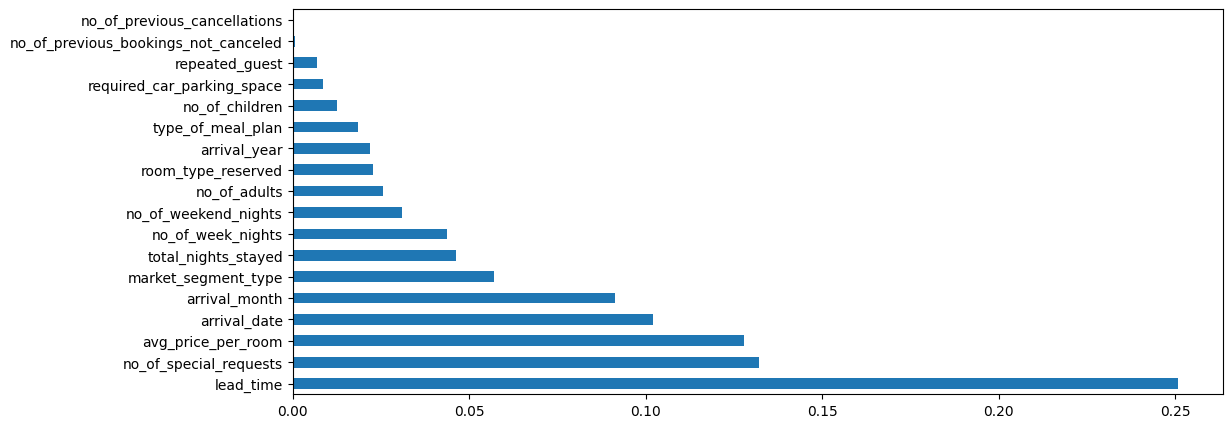

In [308]:
plt.figure(figsize=(12, 5))
feature_imp = pd.Series(selector.feature_importances_, index=X.columns)
feature_imp.nlargest(20).plot(kind="barh")
plt.show()

In [312]:
X.sample(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,total_nights_stayed
13387,2,1,2,1,0,0,3,115,2018,10,9,4,0,0,0,151.20,2,3
22547,2,0,2,3,0,0,0,174,2018,9,9,4,0,0,0,119.85,1,5
14043,2,0,2,3,0,0,1,73,2018,3,17,4,0,0,0,72.12,1,5
24624,1,0,1,2,0,0,0,187,2018,10,7,4,0,0,0,108.90,3,3
6958,2,0,0,3,3,1,0,3,2018,9,15,4,0,0,0,161.33,2,3
16661,2,0,1,3,3,0,0,39,2018,3,3,4,0,0,0,71.10,0,4
2546,2,0,1,5,0,0,3,111,2018,11,21,4,0,0,0,97.75,1,6
18151,1,0,2,1,1,0,0,110,2017,7,25,3,0,0,0,36.25,0,3
9995,2,0,2,1,0,0,0,55,2018,4,3,3,0,0,0,75.00,1,3
10214,1,1,2,1,1,0,1,117,2017,8,1,3,0,0,0,80.75,1,3


In [ ]:
from sklearn.decomposition import PCA
from typing import List


def fit_pca(X: pd.DataFrame, columns: List[str], n_components: int = 4):
    """
    Fit PCA on selected columns of X.
    Returns the fitted PCA object and the transformed X.
    """
    pca = PCA(n_components=n_components)
    X_selected = X[columns]
    X_pca = pca.fit_transform(X_selected)
    return pca, X_pca


def get_pca_feature_importance(pca, columns: List[str]):
    """
    Get the most important original feature for each principal component.
    Returns a DataFrame and a list of most important feature names.
    """
    n_pcs = pca.components_.shape[0]
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
    most_important_names = [columns[most_important[i]] for i in range(n_pcs)]
    dic = {"PC{}".format(i + 1): most_important_names[i] for i in range(n_pcs)}
    df = pd.DataFrame(
        sorted(dic.items()), columns=["Principal Component", "Most Important Feature"]
    )
    return df, most_important_names


def select_pca_features(X: pd.DataFrame, feature_names: list):
    """
    Select columns from X based on feature_names.
    """
    return X.loc[:, feature_names]


In [ ]:
cols = [
    "lead_time",
    "avg_price_per_room",
    "no_of_special_requests",
]
X[cols]

,lead_time,avg_price_per_room,no_of_special_requests
0,224,65.00,0
1,5,106.68,1
2,1,60.00,0
3,211,100.00,0
4,48,94.50,0
...,...,...,...
36269,0,216.00,0
36270,85,167.80,1
36271,228,90.95,2
36272,148,98.39,2


In [317]:
# Example usage:
chosen_columns = [
    "lead_time",
    "avg_price_per_room",
    "no_of_special_requests",
    "arrival_date",
    "arrival_month",
    "market_segment_type",
    "total_nights_stayed",
    "no_of_week_nights",
]
pca, X_pca = fit_pca(X, chosen_columns, n_components=5)

In [318]:
importance_df, important_features = get_pca_feature_importance(pca, chosen_columns)
selected_X = select_pca_features(X, important_features)

In [319]:
selected_X

,lead_time,avg_price_per_room,arrival_date,arrival_month,total_nights_stayed
0,224,65.00,2,10,3
1,5,106.68,6,11,5
2,1,60.00,28,2,3
3,211,100.00,20,5,2
4,48,94.50,11,4,2
...,...,...,...,...,...
36269,0,216.00,6,10,1
36270,85,167.80,3,8,8
36271,228,90.95,17,10,4
36272,148,98.39,1,7,8


In [ ]:
from sklearn.preprocessing import LabelEncoder
from typing import List, Tuple
from sklearn.ensemble import ExtraTreesClassifier

cat_cols = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]


def generate_new_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Generate new features from the DataFrame.
    Args:
        df (pd.DataFrame): DataFrame to generate new features from.
    Returns:
        pd.DataFrame: DataFrame with new features.
    """
    df["total_nights_stayed"] = df["no_of_weekend_nights"] + df["no_of_week_nights"]
    df["is_repeat_guest"] = df["repeated_guest"].apply(lambda x: 1 if x == "Yes" else 0)
    return df


def generate_label_encoder() -> LabelEncoder:
    """
    Generate a LabelEncoder instance for encoding categorical variables.
    Returns:
        LabelEncoder: Instance of LabelEncoder.
    """
    label_encoder = LabelEncoder()
    return label_encoder


def encode_categorical_columns(
    categorical_columns: List[str], label_encoder: LabelEncoder, df: pd.DataFrame
) -> pd.DataFrame:
    """
    Encode categorical columns in the DataFrame using the provided LabelEncoder.
    Args:
        categorical_columns (List[str]): List of categorical column names to encode.
        label_encoder (LabelEncoder): Instance of LabelEncoder to use for encoding.
        df (pd.DataFrame): DataFrame containing the data.
    Returns:
        pd.DataFrame: DataFrame with encoded categorical columns.
    """
    if not categorical_columns:
        raise ValueError("No categorical columns provided for encoding.")
    if label_encoder is None:
        raise ValueError("LabelEncoder instance is not provided.")
    if df.empty:
        raise ValueError("DataFrame is empty. Cannot encode categorical columns.")
    if not all(col in df.columns for col in categorical_columns):
        raise ValueError(
            "Some categorical columns are not present in the DataFrame: "
            f"{set(categorical_columns) - set(df.columns)}"
        )
    df[categorical_columns] = df[categorical_columns].apply(
        lambda x: label_encoder.fit_transform(x)
    )
    return df


def separate_data(
    df: pd.DataFrame, target_column: str
) -> Tuple[pd.DataFrame, pd.Series]:
    """
    Separate the DataFrame into features (X) and target variable (y).
    Args:
        df (pd.DataFrame): DataFrame containing the data.
        target_column (str): Name of the target column.
    Returns:
        Tuple[pd.DataFrame, pd.Series]: Features DataFrame (X) and target variable Series (y).
    """
    if target_column not in df.columns:
        raise ValueError(f"Target column '{target_column}' not found in DataFrame.")
    X = df.drop(columns=[target_column], axis=1)
    y = df[target_column]
    return X, y


def create_feature_importance_selector(
    X: pd.DataFrame, y: pd.Series
) -> ExtraTreesClassifier:
    """
    Create a feature importance selector using ExtraTreesClassifier.
    Args:
        X (pd.DataFrame): Features DataFrame.
        y (pd.Series): Target variable Series.
    Returns:
        ExtraTreesClassifier: Fitted ExtraTreesClassifier instance.
    """
    if X.empty or y.empty:
        raise ValueError("Features DataFrame or target variable Series is empty.")
    selector = ExtraTreesClassifier(n_estimators=100)
    selector.fit(X, y)
    return selector


def get_important_features(
    selector: ExtraTreesClassifier, X: pd.DataFrame, threshold: float = 0.05
) -> Tuple[pd.DataFrame, List[str]]:
    """
    Get features with importance scores above the threshold.

    Args:
        selector: Fitted ExtraTreesClassifier
        X: Features DataFrame
        threshold: Minimum importance score (default: 0.05)

    Returns:
        DataFrame containing only the important features
    """
    if not isinstance(selector, ExtraTreesClassifier):
        raise ValueError("Selector must be an instance of ExtraTreesClassifier.")
    if X.empty:
        raise ValueError("Features DataFrame is empty. Cannot get important features.")
    if not hasattr(selector, "feature_importances_"):
        raise ValueError("Selector does not have feature_importances_ attribute.")
    if not isinstance(threshold, (int, float)):
        raise ValueError("Threshold must be a numeric value (int or float).")
    if threshold < 0 or threshold > 1:
        raise ValueError("Threshold must be between 0 and 1.")
    importances = selector.feature_importances_
    mask = importances > threshold
    feature_names = X.columns[mask]
    return X[feature_names], feature_names.tolist()


def fit_pca(X: pd.DataFrame, columns: List[str], n_components: int = 4):
    """
    Fit PCA on selected columns of X.
    Returns the fitted PCA object and the transformed X.
    """
    pca = PCA(n_components=n_components)
    X_selected = X[columns]
    X_pca = pca.fit_transform(X_selected)
    return pca, X_pca


def get_pca_feature_importance(pca, columns: List[str]):
    """
    Get the most important original feature for each principal component.
    Returns a DataFrame and a list of most important feature names.
    """
    n_pcs = pca.components_.shape[0]
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
    most_important_names = [columns[most_important[i]] for i in range(n_pcs)]
    dic = {"PC{}".format(i + 1): most_important_names[i] for i in range(n_pcs)}
    df = pd.DataFrame(
        sorted(dic.items()), columns=["Principal Component", "Most Important Feature"]
    )
    return df, most_important_names


def select_pca_features(X: pd.DataFrame, feature_names: list):
    """
    Select columns from X based on feature_names.
    """
    return X.loc[:, feature_names]


def save_feature_engineered_data(
    df: pd.DataFrame, y: pd.Series, output_path: str
) -> None:
    """
    Save the feature engineered DataFrame and target variable to a CSV file.
    Args:
        df (pd.DataFrame): Feature engineered DataFrame.
        y (pd.Series): Target variable Series.
        output_path (str): Path to save the feature engineered data.
    """
    try:
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        df.to_csv(output_path, index=False)
        y.to_csv(output_path.replace(".csv", "_target.csv"), index=False)
        logger.info(f"Feature engineered data saved to {output_path}")
    except Exception as e:
        logger.error(f"Error saving feature engineered data: {e}")
        raise e


SyntaxError: incomplete input (4061223774.py, line 28)

In [ ]:
import pandera as pa
from pandera import Column, DataFrameSchema, Check


def no_duplicates(df: pd.DataFrame) -> bool:
    """Check that there are no duplicate rows in the DataFrame."""
    return not df.duplicated().any()


# Define the schema for the cleaned DataFrame
def define_cleaned_schema() -> DataFrameSchema:
    """
    Define the schema for the cleaned DataFrame.
    Returns:
        DataFrameSchema: Schema for the cleaned DataFrame.
    """
    return DataFrameSchema(
        columns={
            "lead_time": Column(pa.Int, Check.ge(0), nullable=False),
            "avg_price_per_room": Column(pa.Float, Check.ge(0), nullable=False),
            "no_of_special_requests": Column(pa.Int, Check.ge(0), nullable=False),
            "arrival_date": Column(pa.Int, Check.in_range(1, 32), nullable=False),
            "arrival_month": Column(pa.Int, Check.in_range(1, 13), nullable=False),
            "arrival_year": Column(pa.Int, Check.in_range(2000, 2100), nullable=False),
            "market_segment_type": Column(pa.Int, nullable=False),
            "room_type_reserved": Column(pa.Int, nullable=False),
            "type_of_meal_plan": Column(pa.Int, nullable=False),
            "total_nights_stayed": Column(pa.Int, Check.ge(0), nullable=False),
            "no_of_week_nights": Column(pa.Int, Check.ge(0), nullable=False),
            "no_of_weekend_nights": Column(pa.Int, Check.ge(0), nullable=False),
            "repeated_guest": Column(pa.Int, Check.isin([0, 1]), nullable=False),
            "required_car_parking_space": Column(
                pa.Int, Check.isin([0, 1]), nullable=False
            ),
            "booking_status": Column(
                pa.String, Check.isin(["Canceled", "Not_Canceled"]), nullable=False
            ),
        },
        checks=Check(no_duplicates, error="Duplicate rows found in the DataFrame."),
    )


cleaned_schema = define_cleaned_schema()


def validate_cleaned_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Validate the cleaned DataFrame using pandera schema.
    Raises an error if validation fails.
    """
    return cleaned_schema.validate(df)